best chromosome :  [20  2  8  1  3  4 10 19 18 17 16 15 11  7 12 13 14  6  9  5]
best_objective :  0
number of conflicts =  0


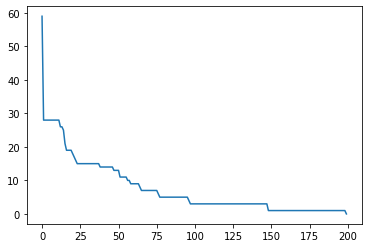

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = open("input.txt","r")
flag = 1
hunter_dict = dict()
while 1:
    line = f.readline()
    if line == '':
        break
    line = line.replace('\n','')
    data = line.split(' ')
    data = list(map(int,data))
    if flag:
        n = data[0]
        for i in range(n):
            hunter_dict[i+1] = []
        flag = 0
    else:
        b = data[1] #prey
        a = data[0] #predator
        hunter_dict[b].append(a)

def objective(chrome):
    q = 0
    num_conflicts = np.zeros(len(chrome)+1)
    num_conflicts[0] = -np.inf
    for i in range(len(chrome)):
        animal = chrome[i]
        hunter_list = hunter_dict[animal]
        for j in range(i+1,len(chrome)):
            if chrome[j] in hunter_list:
                q = q + j - i
    return q

def conflict_num(chrome):
    q = 0
    num_conflicts = np.zeros(len(chrome)+1)
    num_conflicts[0] = -np.inf
    for i in range(len(chrome)):
        animal = chrome[i]
        hunter_list = hunter_dict[animal]
        for j in range(i+1,len(chrome)):
            if chrome[j] in hunter_list:
                q = q + 1
    return q

n = len(hunter_dict)
population_size = 60
max_pop_size = 100
crossover_coeff = 0.8
mutation_coeff = 0.4
max_iteration = 500
num_crossover = round(population_size * crossover_coeff)
num_mutation = round(population_size * mutation_coeff)
total = population_size + num_crossover + num_mutation

population = []
object_values = []
best_objectives = []
best_objective = np.inf
best_chromosome = np.zeros(n)

# initial population
while len(population) < population_size:
    temp = np.random.permutation(n) + 1
    population.append(temp)
    object_values.append(objective(temp))
    
#main loop of genetic algorithm
iteration = 0
unchanged_iteration = 0
while iteration < max_iteration:
    # roulette wheel
    summation = sum(object_values)
    pr = []
    cumulative_pr = []
    for i in range(population_size):
        pr.append(1 - object_values[i]/summation)
    cumulative_pr.append(pr[0])
    for i in range(1, population_size-1):
        temp = cumulative_pr[i-1] + pr[i]
        cumulative_pr.append(temp)
    cumulative_pr.append(1)
    for i in range(0, int(num_crossover), 2):
        p1 = 0
        temp = np.random.rand()
        while cumulative_pr[p1] < temp:
            p1 = p1 + 1
        p2 = p1
        while p1 == p2:
            temp = np.random.rand()
            p = 0
            while cumulative_pr[p] < temp:
                p = p + 1
            p2 = p
            
        parent1 = population[p1]
        parent2 = population[p2]
        # Order Crossover
        # child1
        temp1 = 0
        temp2 = 0
        while temp1 == temp2:
            temp1 = np.random.randint(1,n-1)
            temp2 = np.random.randint(1,n-1)

        if temp2 < temp1:
            a = temp1
            temp1 = temp2
            temp2 = a

        child1 = np.zeros(n)
        child1[temp1:temp2] = parent1[temp1:temp2]
        i = 0
        for j in range(n):
            if i>= temp1 and i< temp2:
                i = temp2
            if not parent2[j] in child1[temp1:temp2]:
                child1[i] = int(parent2[j])
                i = i + 1

        child1 = child1.astype(int) 
        
        #child2
        temp1 = 0
        temp2 = 0
        while temp1 == temp2:
            temp1 = np.random.randint(1,n-1)
            temp2 = np.random.randint(1,n-1)

        if temp2 < temp1:
            a = temp1
            temp1 = temp2
            temp2 = a

        child2 = np.zeros(n)
        child2[temp1:temp2] = parent2[temp1:temp2]
        i = 0
        for j in range(n):
            if i>= temp1 and i< temp2:
                i = temp2
            if not parent1[j] in child2[temp1:temp2]:
                child2[i] = int(parent1[j])
                i = i + 1

        child2 = child2.astype(int)

        population.append(child1)
        object_values.append(objective(child1))
        population.append(child2)
        object_values.append(objective(child2))
    
    
    if unchanged_iteration >= 50:
        child_obj = object_values[len(object_values)-num_crossover:]
        sort_args = np.argsort(child_obj)
        sort_args = sort_args[:num_mutation]
        for h in range(num_mutation):
            chrome = population[sort_args[h]]
            num_conflicts = np.zeros(len(chrome)+1)
            num_conflicts[0] = -np.inf
            for i in range(len(chrome)):
                animal = chrome[i]
                hunter_list = hunter_dict[animal]
                for j in range(i+1,len(chrome)):
                    if chrome[j] in hunter_list:
                        num_conflicts[chrome[i]] = num_conflicts[chrome[i]] + 1
            
            summ = np.sum(num_conflicts[1:])
            conflicts_pr = np.zeros(len(num_conflicts))
            conflicts_pr[0] = 0
            conflicts_pr[1:] = num_conflicts[1:]/summ
            
            conflicts_cumu = np.zeros(len(num_conflicts))
            conflicts_cumu[0] = 0
            conflicts_cumu[1] = conflicts_pr[1]
            for i in range(2,len(conflicts_pr)-1):
                conflicts_cumu[i] = conflicts_cumu[i-1] + conflicts_pr[i]
                
            conflicts_cumu[len(conflicts_cumu)-1] = 1
            k = np.random.rand()
            number = 1
            for i in range(1,len(conflicts_cumu)):
                if k > conflicts_cumu[i]:
                    number = number + 1
            hunter_list_2 = hunter_dict[number]         
            for j in range(len(chrome)-1,-1,-1):
                if chrome[j] in hunter_list_2:
                    i2 = j
                    break
            for i in range(len(mutated)):
                if chrome[i] == number:
                    i1 = i
                    break
            t = chrome[i1]
            chrome[i1] = chrome[i2]
            chrome[i2] = t
            
            population.append(chrome)
            object_values.append(objective(chrome))
        
    else:    
        #Screamble Mutation
        for i in range(num_mutation):
            temp = np.random.randint(num_crossover)
            temp = population_size + temp
            mutated = population[temp]
            temp1 = 0
            temp2 = 0
            while temp1 == temp2:
                temp1 = np.random.randint(n)
                temp2 = np.random.randint(n)
            if temp2 < temp1:
                temp = temp1
                temp1 = temp2
                temp2 = temp
            temp = mutated[temp1:temp2]
            temp = np.random.permutation(temp)
            mutated[temp1:temp2] = temp
            mutated = mutated.astype(int)
            population.append(mutated)
            object_values.append(objective(mutated))
        
    # update best solution
    if best_objective == min(object_values):
        unchanged_iteration = unchanged_iteration + 1
    else:
        unchanged_iteration = 0
    best_objective = min(object_values)
    best_arg = np.argmin(object_values)
    best_chromosome = population[best_arg]
    
    # keep best chromosomes
    if len(population) > max_pop_size:
        temp_population = []
        temp_objective = []
        args = np.argsort(object_values)
        for i in range(max_pop_size):
            t = i
            temp_population.append(population[args[t]])
            temp_objective.append(object_values[args[t]])
        population = temp_population
        object_values = temp_objective
        population_size = max_pop_size
    
    best_objectives.append(best_objective)
    if best_objective == 0:
        break
    iteration = iteration + 1

print("best chromosome : ",best_chromosome)
print("best_objective : ",best_objective)
print("number of conflicts = ",conflict_num(best_chromosome))
plt.plot(range(len(best_objectives)),best_objectives)
plt.show()

***********************
[20  2  7  4  1  3 10  8 19 18 17 16 15 11 12 13  6 14  9  5]
0


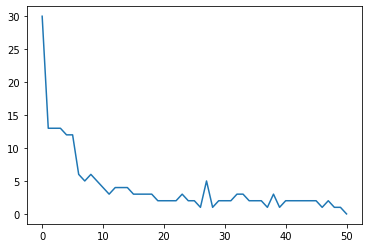

In [11]:
#SA algorithm
import numpy as np
import math

def initial_solution(n):
    solution = np.random.permutation(n) + 1
    fitness = objective(solution)
    return solution, fitness
    
def objective(solution):
    q = 0
    for i in range(len(solution)):
        animal = solution[i]
        hunter_list = hunter_dict[animal]
        for j in range(i+1,len(solution)):
            if solution[j] in hunter_list:
                q = q + 1
    return q
def make_neighbour(solution):
    dislocation = np.zeros(len(solution)+1)
    neighbour = solution.copy()
    #print(neighbour)
    #print(objective(neighbour))
    #print("+++++++++++++")
    for i in range(0,len(neighbour)):
        #print("neighbour[i] is : ",neighbour[i])
        hunter_list = hunter_dict[neighbour[i]]
        #print(hunter_list)
        #print("aaaaaaaaaaaaaaaaaaaaaaaaaa")
        for j in range(i+1,len(neighbour)):
            if neighbour[j] in hunter_list:
                dislocation[neighbour[i]] = dislocation[neighbour[i]] + 1
    #print(dislocation)
    #print("&&&&&&&&&&&&&&")
    number = dislocation.argmax()
    hunter_list_2 = hunter_dict[number]
    #print('hunter_list_2 is: ',hunter_list_2)
    for j in range(len(neighbour)-1,-1,-1):
        #print("neighbour[j] is : ",neighbour[j])
        if neighbour[j] in hunter_list_2:
            i2 = j
            #print("i2 is : ",i2)
            break
    for i in range(len(neighbour)):
        if neighbour[i] == number:
            i1 = i
            break
    temp = neighbour[i1]
    neighbour[i1] = neighbour[i2]
    neighbour[i2] = temp
    #print(neighbour)
    #print(objective(neighbour))
    return neighbour

def SA(n,T,t_change):
    solution, fitness = initial_solution(n)
    objectives_sa = []
    objectives_sa.append(fitness)
    while T > 0:
        neighbour = make_neighbour(solution)
        fit = objective(neighbour)
        
        delta = -1*(fit - fitness)
        if delta >= 0:
            solution = neighbour
            fitness = fit
        else:
            pr = math.exp(delta / T)
            if pr >= 0.999:
                solution = neighbour
                fitness = fit
                #print("pr is: ",pr)
        #print(fitness)
        objectives_sa.append(fitness)
        if fitness == 0:
            return solution,fitness,objectives_sa
        #print("////////////")
        T = int(T*t_change)
    return solution, fitness,objectives_sa
        
# INITIAL DATA & PARAMETERS
T = 100000
t_change = 0.96    
f = open("C:/Users/pjrad/OneDrive/Desktop/Term6/AI/HW-ans/HW2/input.txt","r")
flag = 1
hunter_dict = dict()
while 1:
    line = f.readline()
    if line == '':
        break
    line = line.replace('\n','')
    data = line.split(' ')
    data = list(map(int,data))
    #print(data)
    #print("+++++++++++++++++++++")
    if flag:
        n = data[0]
        for i in range(n):
            hunter_dict[i+1] = []
        flag = 0
    else:
        b = data[1] #prey
        a = data[0] #predator
        hunter_dict[b].append(a)
#print(hunter_dict)
#print(";;;;;;;;;;;;;;;;;;;;;;;")
n = len(hunter_dict)
solution, fitness,objectives_sa = SA(n,T,t_change)
print("***********************")
print(solution)
print(fitness)
plt.plot(range(len(objectives_sa)),objectives_sa)
plt.show()

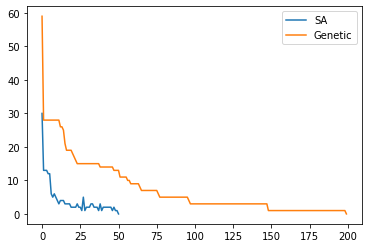

In [13]:
plt.plot(range(len(objectives_sa)),objectives_sa, label="SA")
plt.plot(range(len(best_objectives)),best_objectives,label="Genetic")
plt.legend()
plt.show()